In [ ]:
#!/usr/bin/env python3

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:

def load_and_analyze_bpe_tokenizer():
    print(" BPE TOKENIZER ANALYSIS")
    print("=" * 50)
    try:
        with open('bpe_tokenizer_tinystories.pkl', 'rb') as f:
            tokenizer = pickle.load(f)
        print(" Tokenizer loaded successfully")
    except FileNotFoundError:
        print(" bpe_tokenizer_tinystories.pkl not found!")
        print(" Make sure the tokenizer file is in the current directory")
        return None
    return tokenizer


In [30]:

def dict_tokenizer_encode(text, tokenizer):
    tokens = []
    for word in text.split():
        token_id = tokenizer['token2id'].get(word + '</w>', tokenizer['token2id'].get('<unk>', -1))
        tokens.append(token_id)
    return tokens


In [31]:

def dict_tokenizer_decode(token_ids, tokenizer):
    return ' '.join([tokenizer['id2token'].get(tid, '<unk>') for tid in token_ids])



In [32]:

def analyze_tokenization_examples(tokenizer):
    sentence1 = "Once upon a time, in a land full of trees, there was a little cherry tree"
    sentence2 = "High hydrogen sulfide levels blight lives of residents around Salton Sea in California"
    print("\n TOKENIZATION ANALYSIS")
    print("=" * 50)

    def create_tokenization_table(text, tokenizer, title):
        print(f"\n {title}")
        print(f"Original text: '{text}'")
        print("-" * 60)
        tokens = dict_tokenizer_encode(text, tokenizer)
        token_strings = [dict_tokenizer_decode([token_id], tokenizer) for token_id in tokens]
        table_data = {
            'Word/Piece': token_strings,
            'Token ID': tokens
        }
        df = pd.DataFrame(table_data)
        print(df.to_string(index=False))
        print(f"\n Tokenization Stats:")
        print(f"   Original characters: {len(text)}")
        print(f"   Number of tokens: {len(tokens)}")
        print(f"   Compression ratio: {len(text)/len(tokens):.2f} chars/token")
        return df, tokens, token_strings

    df1, tokens1, strings1 = create_tokenization_table(sentence1, tokenizer, "Sentence 1: TinyStories-style")
    df2, tokens2, strings2 = create_tokenization_table(sentence2, tokenizer, "Sentence 2: Complex/Technical")
    return df1, df2, tokens1, tokens2, strings1, strings2


In [33]:


def analyze_tokenization_patterns(tokenizer, tokens1, strings1, tokens2, strings2):
    print("\n TOKENIZATION PATTERN ANALYSIS")
    print("=" * 50)
    def categorize_tokens(tokens, strings):
        categories = {
            'common_words': [],
            'rare_words': [],
            'subwords': [],
            'punctuation': [],
            'single_chars': []
        }
        for token_id, token_str in zip(tokens, strings):
            token_clean = token_str.strip()
            if len(token_clean) == 1 and not token_clean.isalnum():
                categories['punctuation'].append((token_str, token_id))
            elif len(token_clean) == 1:
                categories['single_chars'].append((token_str, token_id))
            elif len(token_clean) <= 3:
                categories['subwords'].append((token_str, token_id))
            elif token_clean.lower() in ['the', 'and', 'was', 'there', 'time', 'once', 'upon']:
                categories['common_words'].append((token_str, token_id))
            else:
                categories['rare_words'].append((token_str, token_id))
        return categories

    cat1 = categorize_tokens(tokens1, strings1)
    cat2 = categorize_tokens(tokens2, strings2)

    print(" SENTENCE 1 (TinyStories-style) TOKEN BREAKDOWN:")
    for category, items in cat1.items():
        if items:
            print(f"   {category.replace('_', ' ').title()}: {[item[0] for item in items]}")

    print("\n SENTENCE 2 (Technical/Complex) TOKEN BREAKDOWN:")
    for category, items in cat2.items():
        if items:
            print(f"   {category.replace('_', ' ').title()}: {[item[0] for item in items]}")

    print("\n💡 KEY OBSERVATIONS:")
    observations = [
        " **Common Words**: Simple, frequent words (like 'the', 'and', 'was') get their own tokens",
        " **Rare/Technical Words**: Complex words (like 'hydrogen', 'sulfide') often split into subwords",
        " **Subword Benefits**: BPE can handle unseen technical terms by breaking them into learnable pieces",
        " **Efficiency**: Common TinyStories vocabulary gets efficient single-token encoding",
        " **Generalization**: The model can understand new words by composing known subword pieces"
    ]
    for obs in observations:
        print(f"   {obs}")



In [34]:

def analyze_special_tokens(tokenizer):
    print("\n SPECIAL TOKENS ANALYSIS")
    print("=" * 50)
    expected_special_tokens = [
        '<pad>', '<unk>', '<bos>', '<eos>', 
        '<user>', '<assistant>', '<system>'
    ]
    print(" SPECIAL TOKENS IN TOKENIZER:")
    for token in expected_special_tokens:
        token_id = tokenizer['token2id'].get(token, None)
        if token_id is not None:
            print(f"   {token}: Token ID {token_id}")
        else:
            print(f"   {token}: Not found or not special")

    print("\n WHY SPECIAL TOKENS ARE NECESSARY:")
    explanations = [
        " **<bos> (Beginning of Sequence)**: Signals the start of text generation",
        " **<eos> (End of Sequence)**: Tells the model when to stop generating", 
        " **<unk> (Unknown)**: Handles rare words not in vocabulary during training",
        " **<pad> (Padding)**: Ensures all sequences in a batch have the same length",
        " **<user>**: Marks the start of user messages in chat format",
        " **<assistant>**: Marks the start of assistant responses",
        " **<system>**: For system prompts and instructions"
    ]
    for exp in explanations:
        print(f"   {exp}")
    print("\n HOW THEY CONTRIBUTE TO MODEL BEHAVIOR:")
    contributions = [
        " **Training**: Model learns to associate these tokens with specific behaviors",
        " **Inference**: Controls generation start/stop and conversation structure", 
        " **Robustness**: Handles edge cases and formatting consistently",
        " **Chat Mode**: Enables structured conversations with clear turn-taking",
        " **Control**: Allows fine-grained control over model output formatting"
    ]
    for cont in contributions:
        print(f"   {cont}")



In [35]:

def create_tokenizer_visualization(tokenizer, tokens1, tokens2):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('BPE Tokenizer Analysis', fontsize=16, fontweight='bold')

    lengths1 = [len(dict_tokenizer_decode([t], tokenizer)) for t in tokens1]
    lengths2 = [len(dict_tokenizer_decode([t], tokenizer)) for t in tokens2]

    axes[0, 0].hist(lengths1, bins=10, alpha=0.7, label='TinyStories sentence', color='blue')
    axes[0, 0].hist(lengths2, bins=10, alpha=0.7, label='Technical sentence', color='red')
    axes[0, 0].set_xlabel('Token Length (characters)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Token Length Distribution')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].scatter(range(len(tokens1)), tokens1, alpha=0.7, label='TinyStories', s=50)
    axes[0, 1].scatter(range(len(tokens2)), tokens2, alpha=0.7, label='Technical', s=50)
    axes[0, 1].set_xlabel('Token Position')
    axes[0, 1].set_ylabel('Token ID')
    axes[0, 1].set_title('Token ID Distribution')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    texts = ['TinyStories Sentence', 'Technical Sentence']
    char_counts = [len("Once upon a time, in a land full of trees, there was a little cherry tree"),
                   len("High hydrogen sulfide levels blight lives of residents around Salton Sea in California")]
    token_counts = [len(tokens1), len(tokens2)]
    compression_ratios = [c/t for c, t in zip(char_counts, token_counts)]

    x = range(len(texts))
    axes[1, 0].bar(x, compression_ratios, color=['blue', 'red'], alpha=0.7)
    axes[1, 0].set_xlabel('Sentence Type')
    axes[1, 0].set_ylabel('Characters per Token')
    axes[1, 0].set_title('Tokenization Efficiency')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(texts, rotation=45, ha='right')
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].axis('off')
    summary_text = f"""
    TOKENIZATION SUMMARY

    TinyStories Sentence:
    • {len(tokens1)} tokens
    • {char_counts[0]} characters
    • {compression_ratios[0]:.2f} chars/token

    Technical Sentence:
    • {len(tokens2)} tokens
    • {char_counts[1]} characters
    • {compression_ratios[1]:.2f} chars/token

    Key Insight:
    Technical vocabulary requires
    more tokens due to subword
    splitting, while simple stories
    compress more efficiently.
    """
    axes[1, 1].text(0.1, 0.9, summary_text, transform=axes[1, 1].transAxes,
                    fontsize=11, verticalalignment='top', fontfamily='monospace',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

    plt.tight_layout()
    plt.show()


 BPE TOKENIZER ANALYSIS
 BPE TOKENIZER ANALYSIS
 Tokenizer loaded successfully

 TOKENIZATION ANALYSIS

 Sentence 1: TinyStories-style
Original text: 'Once upon a time, in a land full of trees, there was a little cherry tree'
------------------------------------------------------------
Word/Piece  Token ID
  Once</w>       860
  upon</w>      9367
     a</w>      1152
 time,</w>      8952
    in</w>      4902
     a</w>      1152
  land</w>      5318
  full</w>      4109
    of</w>      6313
trees,</w>      9135
 there</w>      8852
   was</w>      9599
     a</w>      1152
little</w>      5536
cherry</w>      2453
  tree</w>      9134

 Tokenization Stats:
   Original characters: 73
   Number of tokens: 16
   Compression ratio: 4.56 chars/token

 Sentence 2: Complex/Technical
Original text: 'High hydrogen sulfide levels blight lives of residents around Salton Sea in California'
------------------------------------------------------------
Word/Piece  Token ID
     <unk>       276
     

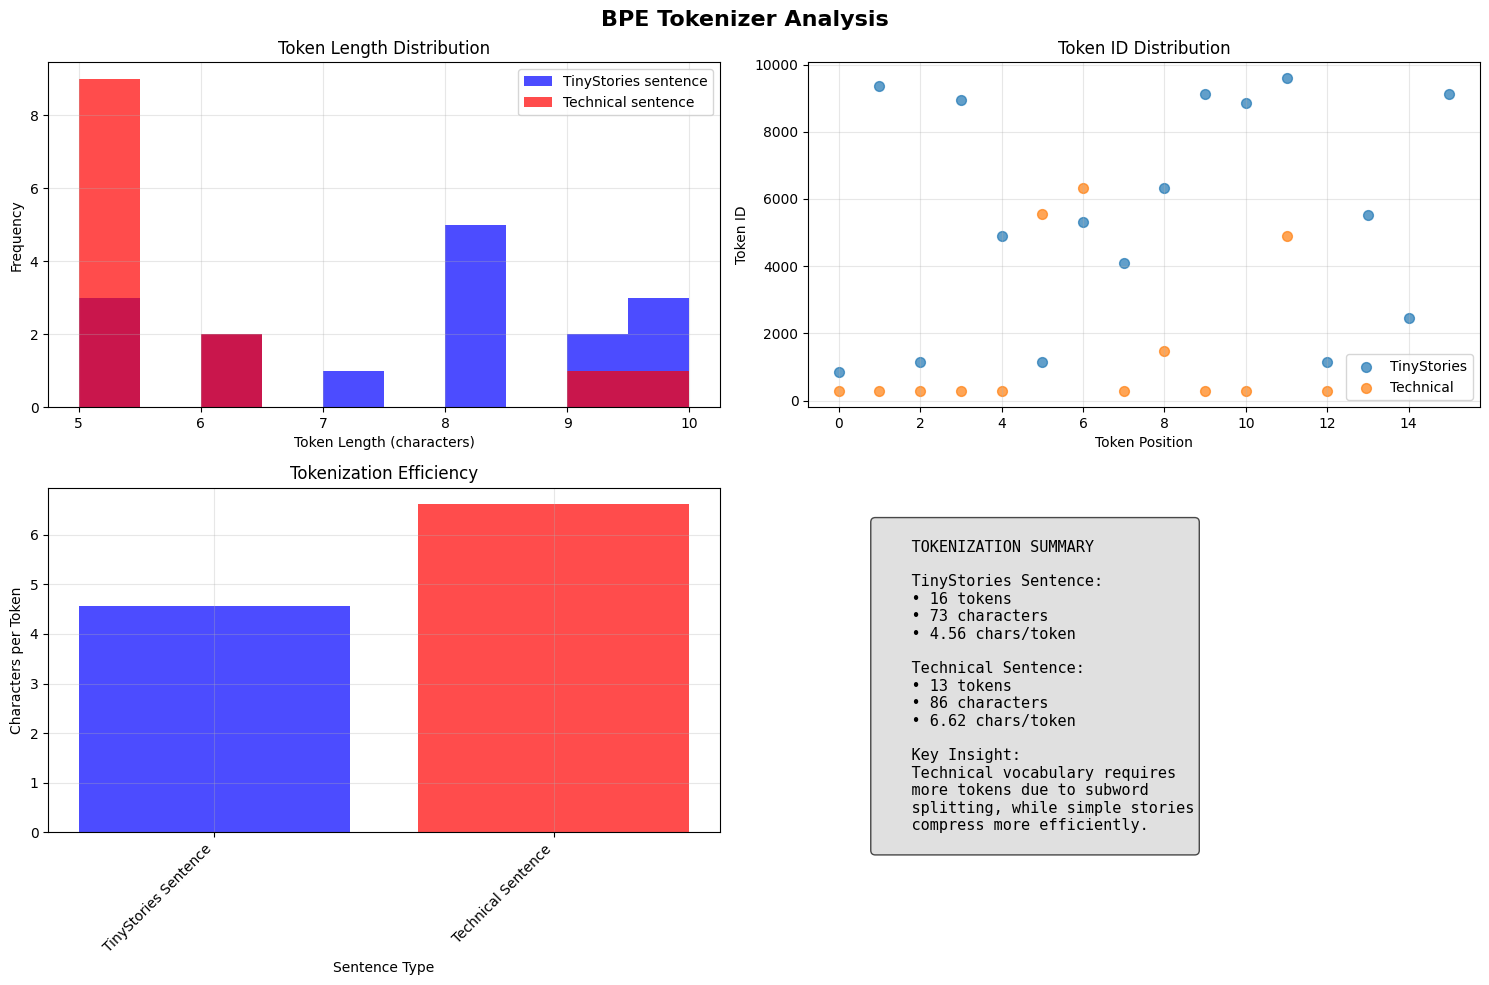

In [36]:

if __name__ == "__main__":
    print(" BPE TOKENIZER ANALYSIS")
    print("=" * 60)
    tokenizer = load_and_analyze_bpe_tokenizer()
    if tokenizer is None:
        exit(1)
    df1, df2, tokens1, tokens2, strings1, strings2 = analyze_tokenization_examples(tokenizer)
    analyze_tokenization_patterns(tokenizer, tokens1, strings1, tokens2, strings2)
    analyze_special_tokens(tokenizer)
    create_tokenizer_visualization(tokenizer, tokens1, tokens2)

